# Simulated time series

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import fem
print 'number of threads: %i' % (fem.fortran_module.fortran_module.num_threads(),)

number of threads: 32


In [11]:
n, m, degs = 16, 4, [1]
par = fem.simulate.model_parameters(n, m, degs)

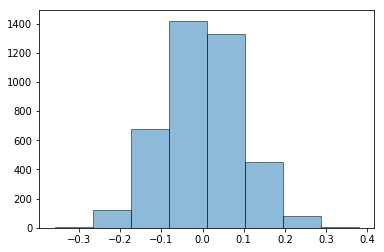

In [12]:
par_flat = np.hstack([p for p in par.itervalues()]).flatten()
tmp = plt.hist(par_flat, bins=int(np.sqrt(m*n)), ec='k', alpha=0.5)

In [13]:
x = fem.simulate.time_series(par, n, m, o=4.0)

In [14]:
tab = []
for i in range(n):
    tab.append([np.unique(x[i]), x[i].mean()])
pd.DataFrame(data=tab, columns=['states', 'average'], index=1+np.arange(n))

,states,average
1,"[0, 1, 2, 3]",1.493774
2,"[0, 1, 2, 3]",1.480652
3,"[0, 1, 2, 3]",1.484741
4,"[0, 1, 2, 3]",1.484619
5,"[0, 1, 2, 3]",1.484802
6,"[0, 1, 2, 3]",1.487854
7,"[0, 1, 2, 3]",1.513733
8,"[0, 1, 2, 3]",1.491882
9,"[0, 1, 2, 3]",1.500427
10,"[0, 1, 2, 3]",1.517273


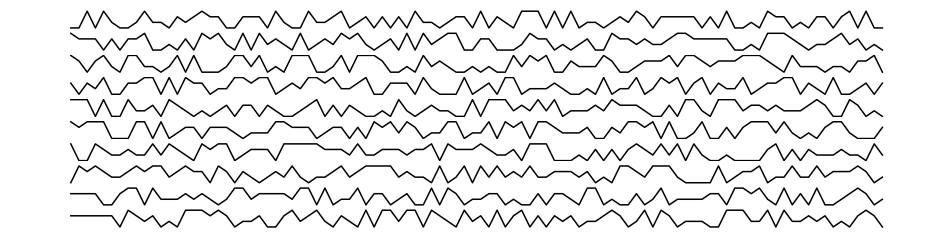

In [15]:
fig, ax = plt.subplots(min(10,n), 1, figsize=(16,4))
for i in range(min(10,n)):
    ax[i].plot(x[i, :100], 'k-')
    ax[i].axis('off')

In [16]:
x1, x2 = x[:, :-1], x[:, 1:]
par_fit, disc = fem.fit.fit(x1, x2, degs, iters=50)

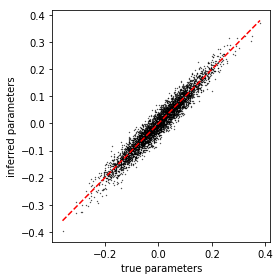

In [17]:
par_fit_flat = np.hstack([p for p in par_fit.itervalues()]).flatten()

fig = plt.figure(figsize=(4,4))
ax = plt.gca()

ax.scatter(par_flat, par_fit_flat, c='k', s=0.1)
lo, hi = par_flat.min(), par_flat.max()
grid = np.linspace(lo, hi)
ax.plot(grid, grid, 'r--')
ax.set_xlabel('true parameters')
ax.set_ylabel('inferred parameters')
    
plt.tight_layout()
plt.show()